In [1]:
!pip install dtw
from dtw import dtw
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display
from IPython.display import Image
%matplotlib inline

  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5315 sha256=7e599064586e17a7fd79cdd9587961a97a13a438f62df9750ecf0a2de40dd889
  Stored in directory: /root/.cache/pip/wheels/f9/51/54/b7f446e6d4f5be9a66066b59c5030731191260515737be4496
Successfully built dtw


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


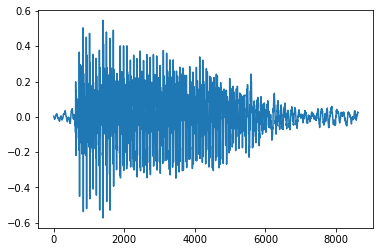

In [3]:
yTest, srTest = librosa.load('/content/drive/MyDrive/Colab Notebooks/data_huyen/A.wav')
plt.plot(yTest)
IPython.display.Audio(data=yTest, rate=srTest)

(20, 17)

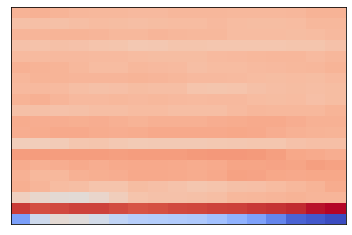

In [4]:
# extract MFCC features 
mfcc = librosa.feature.mfcc(yTest, srTest)
# display spectrum
librosa.display.specshow(mfcc)
mfcc.shape 

In [5]:
mfcc.shape[0] # number of windows

20

In [6]:
mfcc.shape[1] # length of each feature

17

In [7]:
# 3 sample of word 'A'
y1, sr1 = librosa.load('/content/drive/MyDrive/Colab Notebooks/data_hien/A.wav')
y2, sr2 = librosa.load('/content/drive/MyDrive/Colab Notebooks/data_huyen/A-2.wav')
y3, sr3 = librosa.load('/content/drive/MyDrive/Colab Notebooks/data_hien/A-2-2.wav')

In [8]:
print(y1, sr1)
print(y2, sr2)
print(y3, sr3)

[0.01269531 0.01577759 0.01826477 ... 0.01501465 0.01643372 0.01295471] 22050
[0.01580811 0.01602173 0.01501465 ... 0.01043701 0.00863647 0.006073  ] 22050
[ 0.0171814   0.03163147  0.01551819 ...  0.00198364 -0.00131226
  0.00430298] 22050


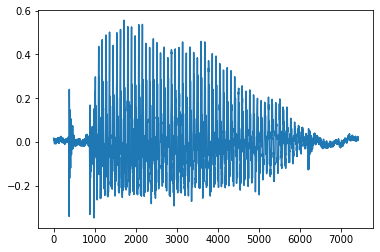

In [9]:
# sample 1
plt.plot(y1)
IPython.display.Audio(data=y1, rate=sr1)

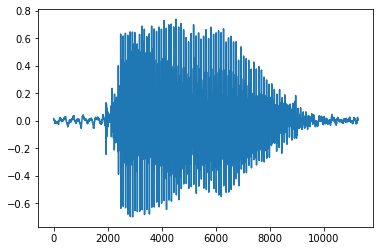

In [10]:
# sample 2
plt.plot(y2)
IPython.display.Audio(data=y2, rate=sr2)

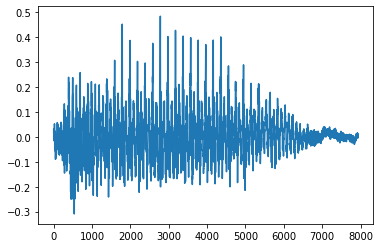

In [11]:
# sample 3
plt.plot(y3)
IPython.display.Audio(data=y3, rate=sr3)

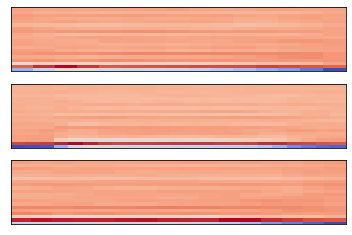

In [12]:
# Convert the data to mfcc:
mfcc1 = librosa.feature.mfcc(y1, sr1)
mfcc2 = librosa.feature.mfcc(y2, sr2)
mfcc3 = librosa.feature.mfcc(y3, sr3)
mfccTest = librosa.feature.mfcc(yTest,srTest)

# Display the spectrum of 3 samples
plt.subplot(3, 1, 1)
librosa.display.specshow(mfcc1)

plt.subplot(3, 1, 2)
librosa.display.specshow(mfcc2)

plt.subplot(3, 1, 3)
librosa.display.specshow(mfcc3)


In [13]:
# Remove mean and normalize each column of MFCC 
import copy
def preprocess_mfcc(mfcc):
    mfcc_cp = copy.deepcopy(mfcc)
    for i in range(mfcc.shape[1]):
        mfcc_cp[:,i] = mfcc[:,i] - np.mean(mfcc[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp

# before removing
print(mfccTest)

mfcc1 = preprocess_mfcc(mfcc1)
mfcc2 = preprocess_mfcc(mfcc2)
mfcc3 = preprocess_mfcc(mfcc3)
mfccTest = preprocess_mfcc(mfccTest)

[[-2.47631561e+02 -1.19839424e+02 -7.32129822e+01 -8.41067657e+01
  -1.11603065e+02 -1.41917358e+02 -1.58887909e+02 -1.62658981e+02
  -1.65738663e+02 -1.71253418e+02 -1.90152512e+02 -2.16927353e+02
  -2.43364212e+02 -2.82458832e+02 -3.25018219e+02 -3.38268768e+02
  -3.53309570e+02]
 [ 1.42872375e+02  1.26330910e+02  1.30362152e+02  1.37075775e+02
   1.37459396e+02  1.27706848e+02  1.19704948e+02  1.24897110e+02
   1.29797974e+02  1.33147934e+02  1.36842773e+02  1.39571930e+02
   1.45652313e+02  1.48653290e+02  1.55250153e+02  1.68342880e+02
   1.74875443e+02]
 [-4.74425507e+01 -6.47453918e+01 -7.52170410e+01 -7.69600525e+01
  -6.44460526e+01 -4.32917404e+01 -2.30375729e+01 -1.87610455e+01
  -1.76220360e+01 -1.62921715e+01 -1.16434212e+01 -1.71858692e+00
   4.04651761e-01  2.39774752e+00  6.54329443e+00  2.86083126e+00
   3.43475699e+00]
 [ 1.35601673e+01  1.93105245e+00 -8.62802887e+00 -1.28776264e+01
  -2.29406834e+01 -2.27428055e+01 -1.07055130e+01 -1.37984886e+01
  -2.09732723e+01 -

In [14]:
# after removing
print(mfccTest)

[[-1.00000000e+00 -9.19971704e-01 -5.53635478e-01 -6.01191044e-01
  -7.74012923e-01 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00]
 [ 6.15132749e-01  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  9.61738408e-01  7.98823893e-01  8.03630114e-01
   8.20451260e-01  8.30715716e-01  7.60235846e-01  6.70957983e-01
   6.25047505e-01  5.60378134e-01  5.14664233e-01  5.30475914e-01
   5.20336866e-01]
 [-1.72013879e-01 -4.90273356e-01 -5.68929970e-01 -5.49454331e-01
  -4.38124686e-01 -2.82417327e-01 -1.22838855e-01 -9.74329337e-02
  -8.76288116e-02 -6.80396482e-02 -3.90745290e-02  8.71114898e-03
   1.83011666e-02  3.10171284e-02  4.56744507e-02  3.05539668e-02
   2.68590376e-02]
 [ 8.02946836e-02  2.97603998e-02 -6.07389733e-02 -8.55469704e-02
  -1.42491773e-01 -1.32906899e-01 -4.32129689e-02 -6.63064271e-02
  -1.08271807e-01 -

In [15]:
print(mfcc1.shape[0], mfcc2.shape[0], mfcc3.shape[0], mfccTest.shape[0])
print(mfcc1.shape[1], mfcc2.shape[1], mfcc3.shape[1], mfccTest.shape[1])

20 20 20 20
15 23 16 17


15 23 16 17
[0. 0.]


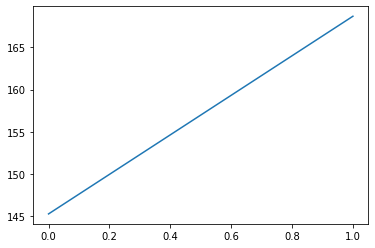

In [16]:
window_size = mfcc1.shape[1]
dists = np.zeros(mfccTest.shape[1] - window_size)
print(mfcc1.shape[1], mfcc2.shape[1], mfcc3.shape[1], mfccTest.shape[1])
print(dists)

for i in range(len(dists)):
    mfcci = mfccTest[:,i:i+window_size]
    dist1i = dtw(mfcc1.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dist2i = dtw(mfcc2.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dist3i = dtw(mfcc3.T, mfcci.T,dist = lambda x, y: np.exp(np.linalg.norm(x - y, ord=1)))[0]
    dists[i] = (dist1i + dist2i + dist3i)/3
plt.plot(dists)


In [17]:
# select minimum distance window
word_match_idx = dists.argmin()

In [18]:
# convert MFCC to time domain
word_match_idx_bnds = np.array([word_match_idx,np.ceil(word_match_idx+window_size)])
samples_per_mfcc = 512
word_samp_bounds = (2/2) + (word_match_idx_bnds*samples_per_mfcc)
print(word_match_idx_bnds, word_samp_bounds)
print(word_samp_bounds[0], word_samp_bounds[1])

[ 0. 15.] [1.000e+00 7.681e+03]
1.0 7681.0


In [19]:
word = yTest[int(word_samp_bounds[0]):int(word_samp_bounds[1])]
print(yTest)
print(word)

[0.00390625 0.00320435 0.00238037 ... 0.02337646 0.02362061 0.02398682]
[ 0.00320435  0.00238037  0.00189209 ... -0.00921631 -0.01184082
 -0.01296997]


In [20]:
IPython.display.Audio(data=word, rate=sr1)